# Import libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the California Housing Dataset

In [4]:
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['PRICE'] = housing.target

# Display basic information about the dataset

In [5]:
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
print("\nFeature descriptions:")
for idx, feature in enumerate(housing.feature_names):
    print(f"{feature}")


Feature descriptions:
MedInc
HouseAge
AveRooms
AveBedrms
Population
AveOccup
Latitude
Longitude


In [7]:
print("\nFirst few rows:")
print(data.head())


First few rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [8]:
print("\nBasic statistics:")
print(data.describe())


Basic statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         PRICE  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.

# Create a correlation matrix

In [9]:
correlation = data.corr()

# # Plot correlation with price

In [10]:
price_correlation = correlation['PRICE'].sort_values(ascending=False)
print("Correlation with PRICE:")
print(price_correlation)

Correlation with PRICE:
PRICE         1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: PRICE, dtype: float64


# Create a scatter plot of the most correlated feature with price

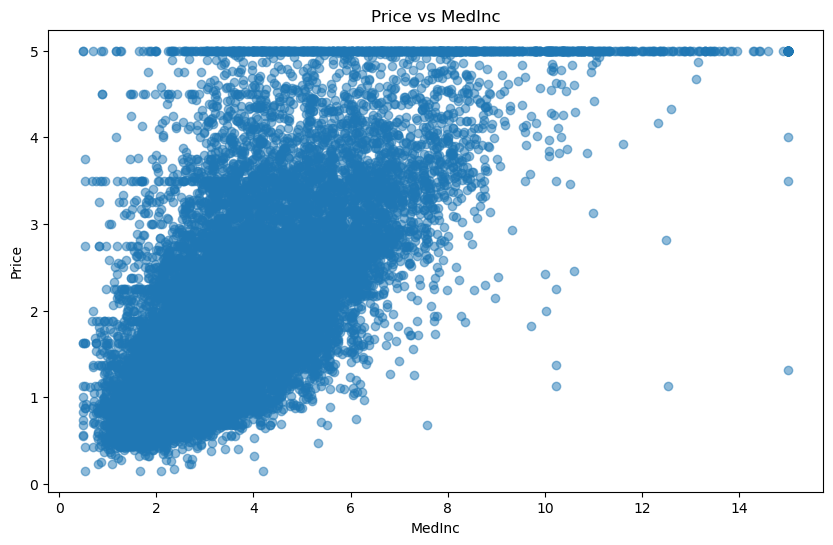

In [11]:
strongest_feature = price_correlation.index[1]
plt.figure(figsize=(10,6))
plt.scatter(data[strongest_feature], data['PRICE'], alpha=0.5)
plt.xlabel(strongest_feature)
plt.ylabel('Price')
plt.title(f'Price vs {strongest_feature}')
plt.show()

# Prepare features (X) and target (y)

In [12]:
X = data.drop('PRICE', axis=1)
y = data['PRICE']

# Split the data into training and testing sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (16512, 8)
Testing set shape: (4128, 8)


# Create and train the model

In [15]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

### make predictions

In [16]:
# make predictions
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

### Calculate performance metrics

In [17]:
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [18]:
print("Model Performance:")
print(f"Training R2 score: {train_r2:.4f}")
print(f"Testing R2 score: {test_r2:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}")

Model Performance:
Training R2 score: 0.6126
Testing R2 score: 0.5758
Training RMSE: 0.7197
Testing RMSE: 0.7456


### Feature importance

In [19]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Coefficient', key=abs, ascending=False))


Feature Importance:
      Feature  Coefficient
6    Latitude    -0.896929
7   Longitude    -0.869842
0      MedInc     0.854383
3   AveBedrms     0.339259
2    AveRooms    -0.294410
1    HouseAge     0.122546
5    AveOccup    -0.040829
4  Population    -0.002308


### Feature Importance

most Important features (in order of absolute impact):

* `Latitude` and `Longitude` are the strongest predictors, suggesting location is cruciaal
* `MedInc` (Median Income ) is the third most important feature, with a strong positive correlation
* Average Bedrooms and Rooms have moderate influence
* House Age has relatively small impact
* Population and Average Occupancy have minimal influnce.

# Create a scatter Plot of actual vs predicted values

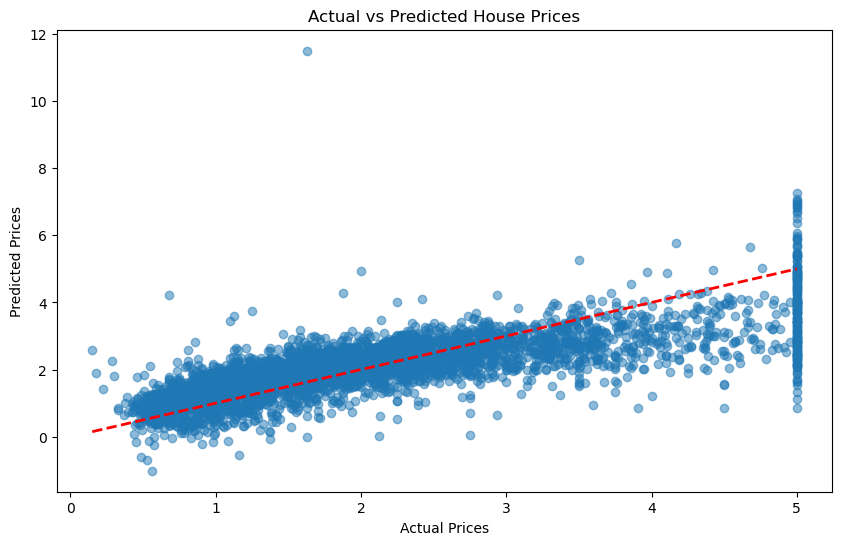

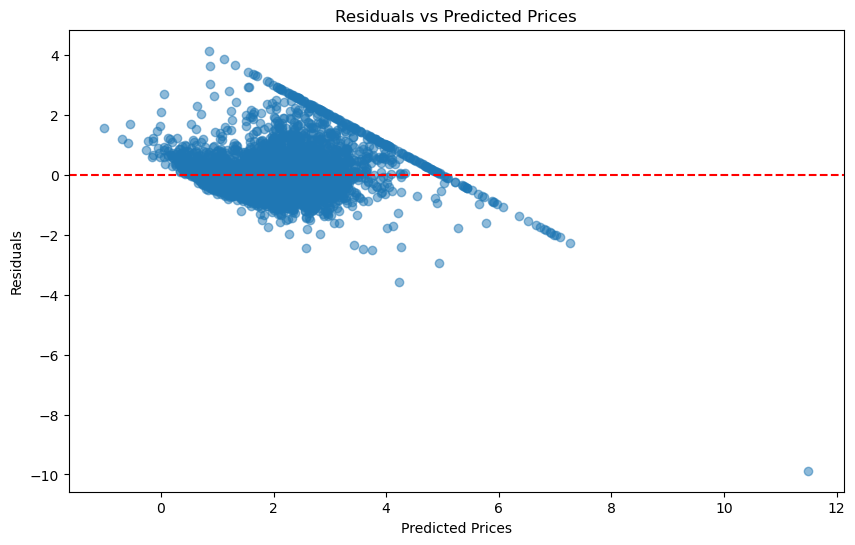

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Plot prediction residuals
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### Analyzing the plots:

**1. Actual vs Predicted Plot (fig: 1)**
* The red dashed line represents prefect predictions (where actual = predicted)
* Points above the line are overpredictions
* Point below the line are underpredictions
* We can see the predictions scatter around the line, but with considerable spread
* The spread increases with higher prices, showing our model is less accurate for expensive houses.

**2. Residuals Plot (fig: 2)**
* The red dashed line at `y=0` represents prefect predictions
* The clear pattern (fan shape) in residuals suggests our model has some issues:
  * More variance in predictions for higher-priced houses
  * Systematic underprediction of high-value houses
  * Some extreme outliers (the point at -10)


# Improve model accuracy

To improve the model's accuracy, we could try:

1. Feature engineering (creating new features or transforming existing ones)
2. Using non-linear models (like Random Forest or XGBoost)
3. Handling outliners in the data
4. Adding interaction terms between features.

## Feature Eigineering

In [21]:
data_engineered = data.copy()

# Add interaction terms between important features
data_engineered['Income_Location'] = data_engineered['MedInc'] * data_engineered['Latitude']
data_engineered['Rooms_per_Household'] = data_engineered['AveRooms'] / data_engineered['AveOccup']
data_engineered['Bedrooms_per_Room'] = data_engineered['AveBedrms'] / data_engineered['AveRooms']
data_engineered['Population_per_Household'] = data_engineered['Population'] / data_engineered['AveOccup']

# Log transform for right-skewed features
data_engineered['MedInc_Log'] = np.log1p(data_engineered['MedInc'])
data_engineered['Population_Log'] = np.log1p(data_engineered['Population'])
data_engineered['AveOccup_Log'] = np.log1p(data_engineered['AveOccup'])

# Drop any rows with infinite values from division
data_engineered = data_engineered.replace([np.inf, -np.inf], np.nan).dropna()

print("New features added. Dataset shape:", data_engineered.shape)
print("\nNew features preview:")
print(data_engineered[['Income_Location', 'Rooms_per_Household', 'Bedrooms_per_Room', 'Population_per_Household']].describe())


New features added. Dataset shape: (20640, 16)

New features preview:
       Income_Location  Rooms_per_Household  Bedrooms_per_Room  \
count     20640.000000         20640.000000       20640.000000   
mean        137.595369             1.976970           0.213075   
std          67.335363             1.146020           0.058023   
min          16.946610             0.002547           0.100000   
25%          91.420044             1.522382           0.175426   
50%         125.173502             1.937936           0.203181   
75%         168.975065             2.296090           0.239834   
max         566.853779            55.222222           1.000000   

       Population_per_Household  
count              20640.000000  
mean                 499.539680  
std                  382.329753  
min                    1.000000  
25%                  280.000000  
50%                  409.000000  
75%                  605.000000  
max                 6082.000000  


## Random Forest Model

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Prepare the engineered data
X = data_engineered.drop('PRICE', axis=1)
y = data_engineered['PRICE']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_pred_train = rf_model.predict(X_train_scaled)
rf_pred_test = rf_model.predict(X_test_scaled)

# Calculate performance metrics
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_pred_train))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_pred_test))

print("\nRandom Forest Performance:")
print(f"Training r2 Score: {rf_train_r2:.4f}")
print(f"Testing r2 Score: {rf_test_r2:.4f}")
print(f"Training RMSE: {rf_train_rmse:.4f}")
print(f"Training RMSE: {rf_test_rmse:.4f}")

# Feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})
print("\nTop 10 Most Important Features:")
print(feature_importance_rf.sort_values(by='Importance', ascending=False).head(10))


Random Forest Performance:
Training r2 Score: 0.9730
Testing r2 Score: 0.8037
Training RMSE: 0.1899
Training RMSE: 0.5072

Top 10 Most Important Features:
                Feature  Importance
12           MedInc_Log    0.257880
0                MedInc    0.254965
6              Latitude    0.080968
7             Longitude    0.080384
5              AveOccup    0.065230
14         AveOccup_Log    0.062341
1              HouseAge    0.050786
10    Bedrooms_per_Room    0.027792
9   Rooms_per_Household    0.024076
2              AveRooms    0.023614


## Analyzing Random Forest model


**1. Performance Improvement:**
* High R2 score (0.80 on the test data) indicates the model explains 80% of the variance
* The gap between training (0.97) and testing (0.80) R2 suggests some overfitting.

**2. Feature Importance Insights:**
* `MedInc` (both log and regular) is by far the most important predictor
* `Location` (Latitude and Longitude) remains important
* Our engineered features like `Bedrooms_per_Room` made it into the top 10

## Visualize

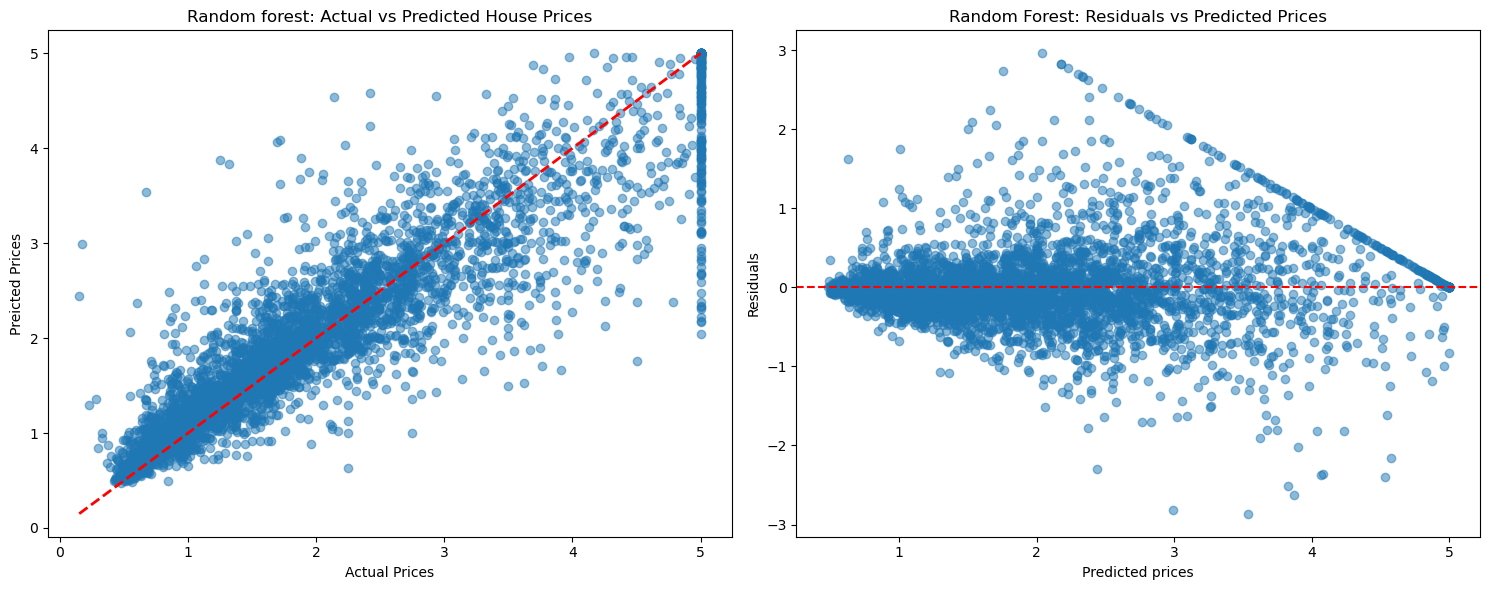


Mean Absolute Error: 0.3310

Mean Absolute Percentage Error: 0.1904


In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Actual vs Predicted
ax1.scatter(y_test, rf_pred_test, alpha=0.5)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Prices')
ax1.set_ylabel('Preicted Prices')
ax1.set_title('Random forest: Actual vs Predicted House Prices')

# Plot 2: Residuals
residuals = y_test - rf_pred_test
ax2.scatter(rf_pred_test, residuals, alpha=0.5)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Predicted prices')
ax2.set_ylabel('Residuals')
ax2.set_title('Random Forest: Residuals vs Predicted Prices')

plt.tight_layout()
plt.show()

# Print additional performance metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mae = mean_absolute_error(y_test, rf_pred_test)
mape = mean_absolute_percentage_error(y_test, rf_pred_test)

print(f"\nMean Absolute Error: {mae:.4f}")
print(f"\nMean Absolute Percentage Error: {mape:.4f}")

# Hyperparameters Tuning using GridSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create base model
rf = RandomForestRegressor(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# Fit the grid search
print('Starting Grid Search...')
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and score
print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
best_rf_pred_train = best_rf_model.predict(X_train_scaled)
best_rf_pred_test = best_rf_model.predict(X_test_scaled)

# Calculate performance metrics
best_rf_train_r2 = r2_score(y_train, best_rf_pred_train)
best_rf_test_r2 = r2_score(y_test, best_rf_pred_test)
best_rf_train_rmse = np.sqrt(mean_squared_error(y_train, best_rf_pred_train))
best_rf_test_rmse = np.sqrt(mean_squared_error(y_test, best_rf_pred_test))


print("\nBest Random Forest Performance:")
print(f"Training R² Score: {best_rf_train_r2:.4f}")
print(f"Testing R² Score: {best_rf_test_r2:.4f}")
print(f"Training RMSE: {best_rf_train_rmse:.4f}")
print(f"Testing RMSE: {best_rf_test_rmse:.4f}")

Starting Grid Search...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score: 0.8034510968946733

Best Random Forest Performance:
Training R² Score: 0.9601
Testing R² Score: 0.8052
Training RMSE: 0.2309
Testing RMSE: 0.5053


### Analysis of Results:

1. Best Parameters Found:
    * `max_depth`: None (lets trees grow to their full depth)
    * `min_samples_leaf`: 2 (minimum 2 samples required at leaf nodes)
    * `min_samples_split`: 2 (minimum 2 samples required to split a node)
    * `n_estimators`: 300 (using 300 trees in the forest)
3. Model Performance:
    * Test R2 score of 0.8052 means our model explains about 80.5% of the variance in house prices
    * The gap between training (0.96) and testing (0.80) R2 indicates some overfitting
    * RMSE of 0.5053 means our predictions are off by about $50,530 on average


# Export Best model

In [31]:
from pathlib import Path
models_dir = Path('../models')
models_dir.mkdir(parents=True, exist_ok=True)
# Save the model
joblib.dump(best_rf_model, models_dir / 'house_price_model.joblib')
# Save the scaler too since we'll need it for new predictions
joblib.dump(scaler, models_dir / 'scaler.joblib')

['../models/scaler.joblib']

In [32]:
# Ensure you have permission to write requirements.txt
!pip freeze > requirements.txt

# Function to test with new data

In [ ]:
def predict_house_price(features_dict):
    """
    Make predictions for new house data

    Args:
        features_dict: Dictionary with features like:
        {
            'MedInc': 8.3252,
            'HouseAge': 41.0,
            'AveRooms': 6.984127,
            'AveBedrms': 1.023810,
            'Population': 322.0,
            'AveOccup': 2.555556,
            'Latitude': 37.88,
            'Longitude': -122.23
        }
    """